# Circuiti 3

In [469]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Circuito RC v1

In [470]:
R = 66.8 * 10 ** (3) #ohm
C = 10 * 10 ** (-9) #farad

freq = 1 / (R*C*2*np.pi)
print(freq)

238.25590283217866


In [471]:
data = np.loadtxt("Dati/RC_v1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0])
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

In [472]:
H = Vout / Vin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


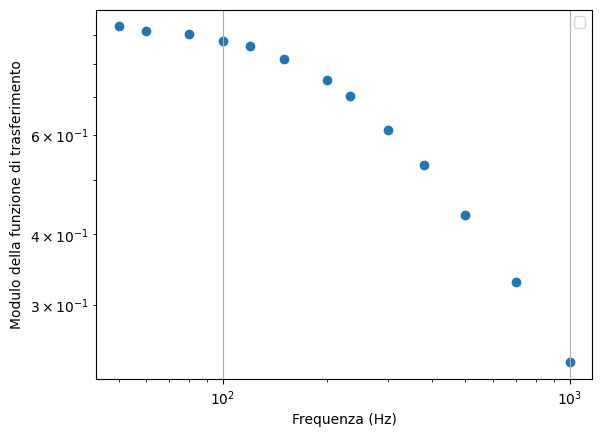

In [473]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, H)

plt.grid()
plt.legend()
plt.show()

In [474]:
Z = np.sqrt(R**2 + 1/(2*np.pi*freq*C)**2)

In [475]:
def model(x,a,b,c):
    return a / np.sqrt(b + c/(x**2))

V_err = 0.01 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 5, b = 0.001, c = 0)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1144 (χ²/ndof = 114.4)     │              Nfcn = 145              │
│ EDM = 1.99e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.15    │   0.13    │            │            │         │         │       │
│ 1 │ b    │  0.0007   │  0.0011   │            │            │         │         │       │
│ 2 │ c    │    17     │    29     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────┐
│   │          a          b          c │
├───┼──────────────────────────────────┤
│ a │     0.0169   144.8e-6      3.769 │
│ b │   144.8e-6   1.24e-06 32.3648e-3 │
│ c │      3.769 32.3648e-3        843 │
└───┴──────────────────────────────────┘

p value: 0.0
10.0


/tmp/ipykernel_4918/2755110170.py:2: RuntimeWarning: divide by zero encountered in divide
  return a / np.sqrt(b + c/(x**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


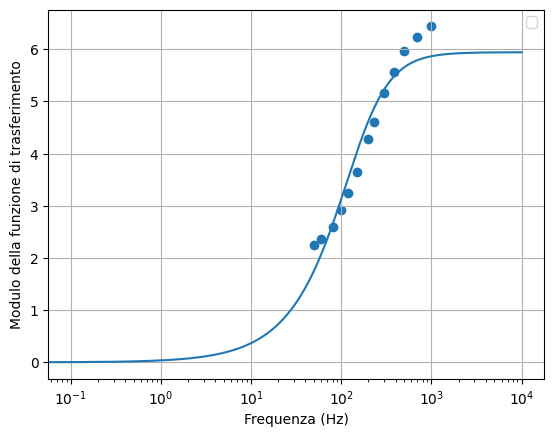

In [476]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(0,10000,100000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.legend()
plt.show()

In [477]:
H = Vin_out / Vin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


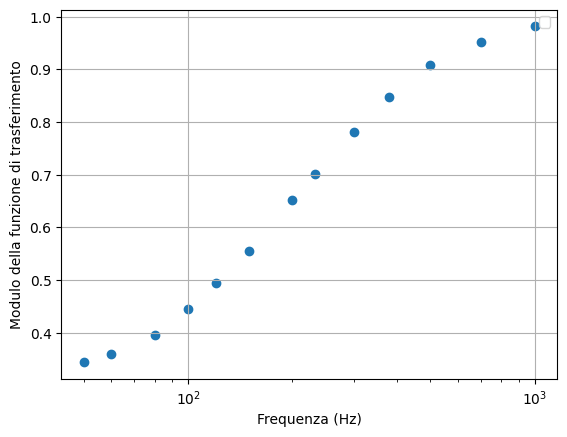

In [478]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, H)

plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


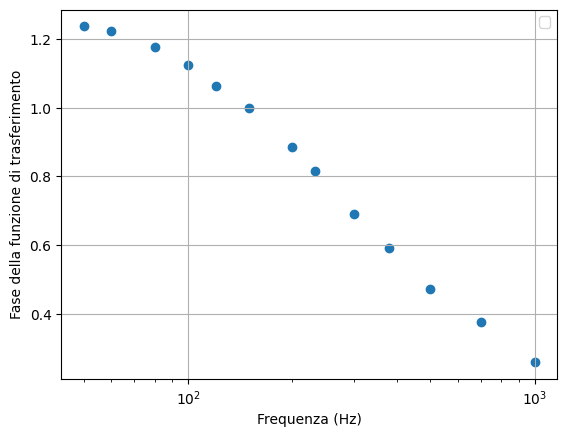

In [479]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, np.pi/2-phdiff)

plt.grid()
plt.legend()
plt.show()

### Circuito RC v2

In [480]:
R = 266.6 #ohm
R_tot = R + 50 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

50270.038879309956


In [481]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(- data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

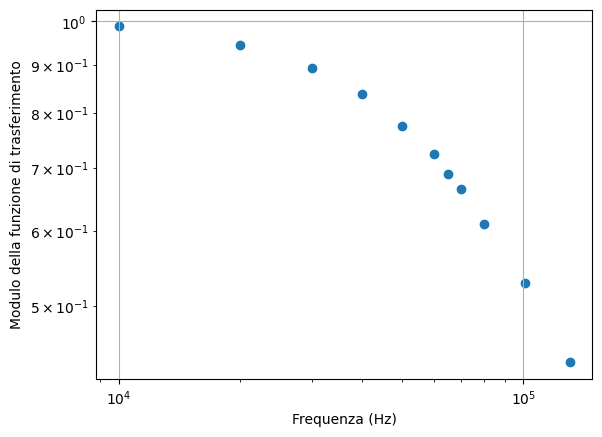

In [482]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

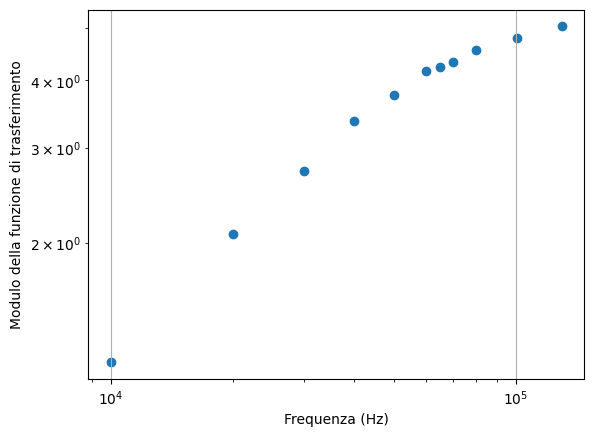

In [483]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vin_out)

plt.grid()
plt.show()

In [484]:
def model(x,a,b):
    return 1 / np.sqrt(a + b/(x**2))

V_err = 0.04 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

/tmp/ipykernel_4918/3462231676.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.048 (χ²/ndof = 0.7)      │              Nfcn = 168              │
│ EDM = 1.27e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0371   │  0.0019   │            │            │         │         │       │
│ 1 │ b    │   76e6    │    4e6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │               a               b │
├───┼─────────────────────────────────┤
│ a │        3.49e-06 -4.9698541946e3 │
│ b │ -4.9698541946e3        1.97e+13 │
└───┴─────────────────────────────────┘

p value: 0.7350746197556824
9.0


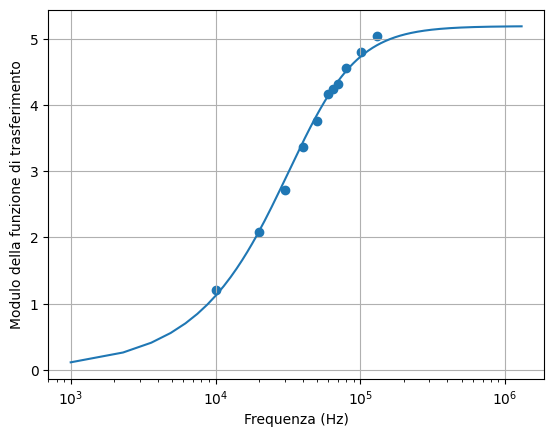

In [485]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(min(freq)/10,max(freq)*10,1000)
y = model(x,m.values["a"],m.values["b"])
plt.plot(x,y)

plt.grid()
plt.show()

[ 1.72372792 -0.16513461 -1.31362168 -0.54052507 -0.55812317  0.11928938
 -0.20636666 -0.09581359  0.33993379  0.24682629  0.69140915]


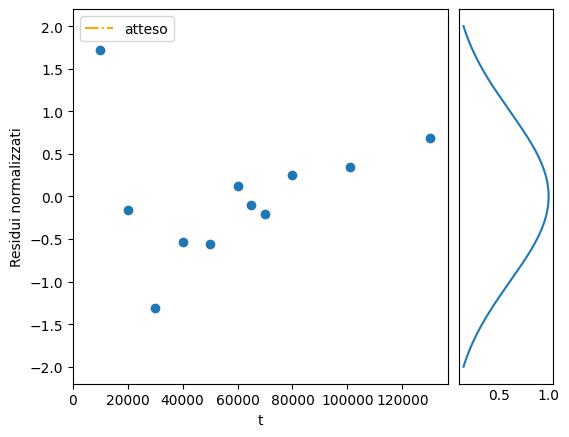

In [486]:
def mostra_residui(freq, V, Verr, model, a, b):
    residuals = (V - model(freq,a,b))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(freq, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(freq) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-2, 2, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(freq, Vin_out, V_err, model, m.values["a"], m.values["b"])

### Circuito RL

In [487]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [488]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(- data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

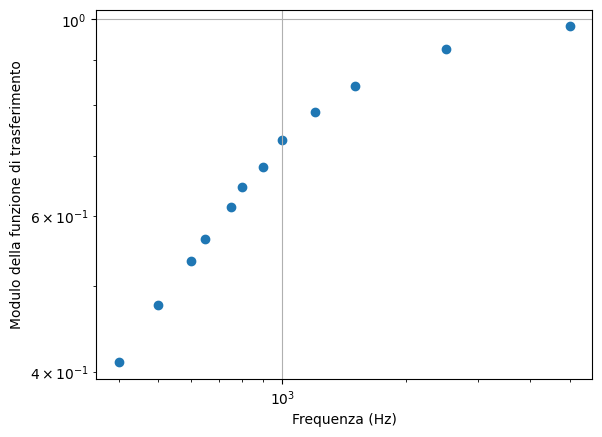

In [489]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [490]:
def model(x,a,b):
    return 1 / np.sqrt(a + b*(x**2))

V_err = 0.02 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 0.005, b = 0.00000001)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.71 (χ²/ndof = 0.8)       │              Nfcn = 113              │
│ EDM = 3.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  43.5e-3  │  1.0e-3   │            │            │         │         │       │
│ 1 │ b    │  28.2e-9  │  0.9e-9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             a             b │
├───┼─────────────────────────────┤
│ a │      9.03e-07 -479.9464e-15 │
│ b │ -479.9464e-15      7.42e-19 │
└───┴─────────────────────────────┘

p value: 0.6571231028505302
10.0


### Circuito RLC

In [491]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [492]:
data = np.loadtxt("Dati/RLC.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

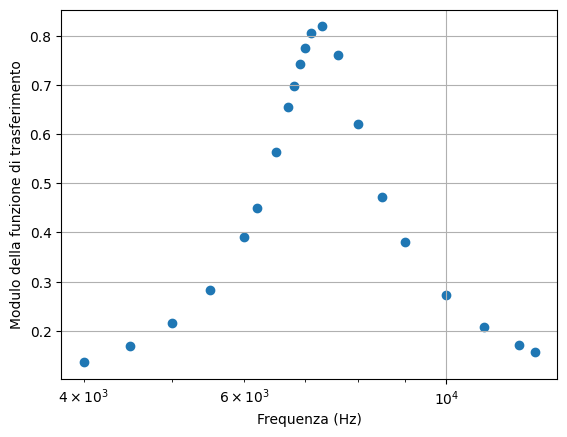

In [493]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [494]:
def model(x,a,b,c):
    return 1 / np.sqrt(a + (b*x - c/x)**2)

V_err = 0.02 * Vout

minimi_quadrati = LeastSquares(freq, Vout, V_err, model)

m = Minuit(minimi_quadrati, a = 10**10 / (25*10**10), b = -56/(25*10**10), c = -(10**9)/(25*10**10))
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.688 (χ²/ndof = 0.5)      │              Nfcn = 462              │
│ EDM = 6.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -2.895   │   0.034   │            │            │         │         │       │
│ 1 │ b    │ -117.2e-6 │  0.7e-6   │            │            │         │         │       │
│ 2 │ c    │  6.26e3   │  0.04e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────────────────┐
│   │              a              b              c │
├───┼──────────────────────────────────────────────┤
│ a │        0.00113     22.7769e-9        -1.1763 │
│ b │     22.7769e-9        4.9e-13 -22.2036440e-6 │
│ c │        -1.1763 -22.2036440e-6       1.31e+03 │
└───┴──────────────────────────────────────────────┘

p value: 0.9416028669156958
18.0


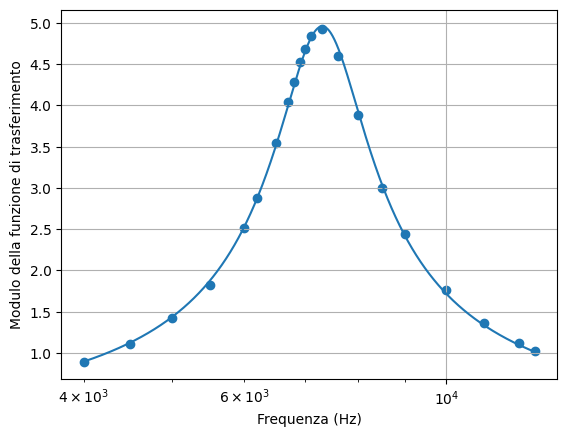

In [495]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()